<a href="https://colab.research.google.com/github/bodorcy/hazifeladatok/blob/main/ml_2_gyakorlas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Egyszerű döntési szabályok - gyakorlás

Az [előző órán](https://colab.research.google.com/drive/1X1MWF3ODdGoJWF9a8QQUQf8rN-W3l0z3) már megismert Titanic adatbázist fogjuk használni.



In [2]:
# openml-hez szükséges csomag
from sklearn.datasets import fetch_openml
# Később még szükség lesz rá
import pandas as pd

# Adatbázis betöltése az OpenML-ből
titanic = fetch_openml(name="titanic", version=1, as_frame=True)

# Jellemzővektorok Pandas DataFrame formátumban
df = titanic.data

# A célváltozót (y) is hozzárendeljük
df["survived"] = titanic.target

# Alapstatisztikák
Határozd meg folytonos változók alapstatisztikáit (átlag, szórás, min, max, medián).

In [3]:
df.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


\\Határozd meg, hogy az utasok neme milyen kapcsolatban van a túléléssel.

In [8]:
df['sex'].value_counts()

,count
sex,
male,843
female,466


# Vizualizáció

Jelenítsd meg az életkor histogramját. Az intervallumként használt oszlopok száma legyen 20.

<Axes: >

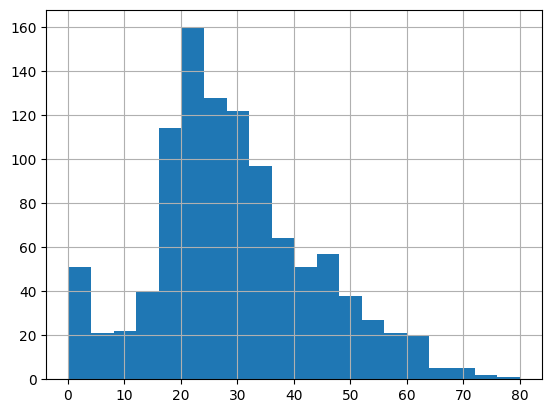

In [10]:
df.age.hist(bins=20)

Ábrázold az életkor és a jegyárak kapcsolat.
 - Csak a 300 dollár alatti jegyárakat vedd figyelembe. (A kiugró értékek elrontják az ábrát.)
 - Készíts egy scatter plot-ot ez alapjá.

Van-e összefüggés a kor és a jegyár között?

<Axes: xlabel='age', ylabel='fare'>

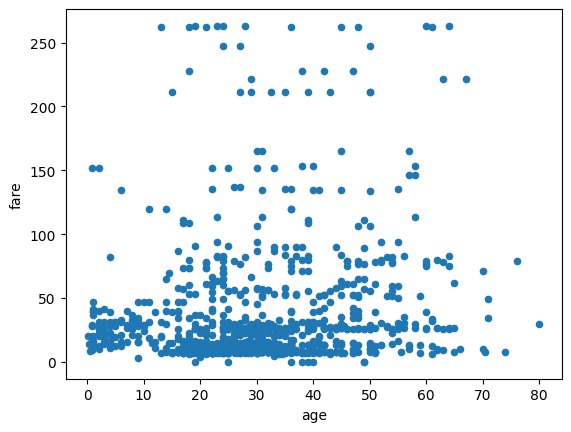

In [13]:

df_age_fare = df[df['fare']<300].loc[:, ['age', 'fare']]
df_age_fare.plot.scatter('age', 'fare')

Ábrázold, hogy az eltérő utasosztályokon (pclass) milyen volt az emberek korának az eloszlása.

Ehhez használj violin plotot, ami az adatokat egyszerre ábrázolja egy folytonos hisztogram és egy box plot formájában.

Violin plot készítésére a legegyszerűbben módszer a [seaborn könyvtár](https://seaborn.pydata.org/generated/seaborn.violinplot.html) használata.

Fontos paraméterek:
 - data: a DataFrame, amit használni akarunk
 - x: oszlopnév: ami alapján csoportosítani szeretnénk
 - y: oszlopnév: aminek az eloszlását meg akarjuk jeleníteni

Példa:

``` python
import seaborn as sns

sns.violinplot(x='...', y='...', data=...)
```
![link text](https://seaborn.pydata.org/archive/0.11/_images/seaborn-violinplot-2.png)

Van-e kapcsolat az utasosztály és az életkor között?

<Axes: xlabel='pclass', ylabel='age'>

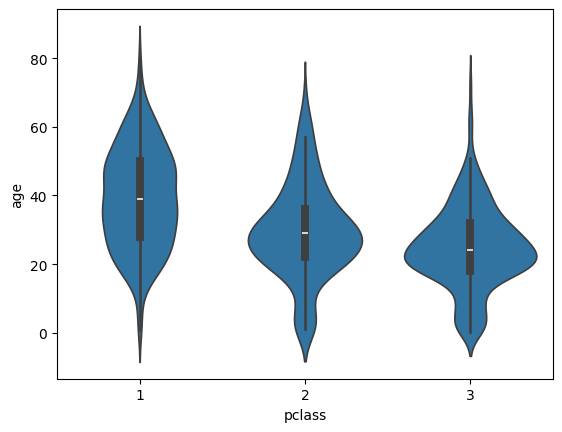

In [16]:
import seaborn as sns

sns.violinplot(x='pclass', y='age', data=df)

# Döntési szabályok - Osztályozás

Legyen a túlélés a célváltozó, amit predikálni szeretnénk.

Készíts egy döntési szabályt, ami azt mondja, hogy mindenki, aki az elsőosztályon tartózkodott túlélte az utat, mindenki más meghalt.

Mekkora az így kapott rendszer accuracy-je?

In [28]:
pred = df.pclass == 1

accuracy = (df.survived.astype(int) == pred.astype(int)).sum() / len(df)


print(accuracy)

0.6768525592055004


Mekkora lenne az accuracy, ha mindig a leggyakoribb osztályt választanánk?

In [32]:
pred = df.pclass == df['pclass'].value_counts().sort_values(ascending=False).iloc[0]

(df.survived.astype(int) == pred.astype(int)).sum() / len(df)

np.float64(0.6180290297937356)

Készíts saját döntési szabályokat az osztályozási feladatra. Légy kreatív.

Mi a legmagasabb accuracy, amit el tudtál érni?

# Döntési szabályok - Regresszió

Legyen a célváltozó a jegyár, próbálj minél jobb döntési szabályt készíteni a többi jellenző alapján.

Készítsétek el az alábbi döntési szabályt:
 - a jegyár legyenaz adott utasosztály jegyárainak az átlaga.

Értékeljétek ki a Mean Absolute Error-t.

In [38]:
pred = [df.groupby('pclass')['fare'].mean()[x] for x in df.pclass]

(df.fare - pred).abs().mean()


np.float64(19.857166423450256)

# Jellemző kiválasztás

A lenti kódrészlet az adatbázisunkat szétszedi jellemzőkre és egy osztálycímkére (túlélte-e a katasztrófát).

A jellemzőket hozzátok gépi tanuló rendszerek által emészthető formába, ehhez:
 - alakítsátok numerikussá az adatot one hot encoding segítségével
 - a hiányzó adatokat töltsétek fel 0-kkal

Határozzátok meg a Chi2 statisztika melyik jellemzőt tartja a legfontosabbnak?

In [78]:
features = df[['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
             'cabin', 'embarked', 'boat', 'body', 'home.dest']]
label = df['survived']

features = features.drop(['name', 'ticket', 'cabin', 'body'], axis=1)
# ha body benne van az orbitális data-leakage

features = pd.get_dummies(features, columns=features.select_dtypes(exclude='number').columns.tolist(), dtype=int)
features.fillna(0, inplace=True)

from sklearn.feature_selection import chi2, SelectKBest

sb = SelectKBest(chi2, k=1)
X_best = sb.fit_transform(features, label)
sb.get_feature_names_out()


array(['fare'], dtype=object)